In [1]:
# import datasets
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, AveragePooling2D, BatchNormalization

%matplotlib inline

In [2]:
#load dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
# look at dataset shape
print(f'train size: {x_train.shape}\ntest size: {x_test.shape}')

train size: (60000, 28, 28)
test size: (10000, 28, 28)


In [4]:
# prepare data
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


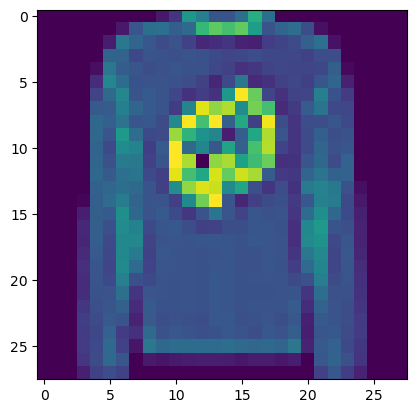

In [5]:
# look at random image from our dataset
n = 123
plt.imshow(x_train[n])
print(y_test[n])

In [6]:
# define model
model = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2,2), strides=2),
    BatchNormalization(),
    
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2,2), strides=2),
    Dropout(0.5),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='Adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 14, 14, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                        

In [7]:
# train our model
model.fit(x_train, y_train, batch_size=30, epochs=5, validation_split=0.2)

Epoch 1/5
1600/1600 [==============================] - 21s 12ms/step - loss: 0.4650 - accuracy: 0.8357 - val_loss: 0.3169 - val_accuracy: 0.8816
Epoch 2/5
1600/1600 [==============================] - 23s 14ms/step - loss: 0.3198 - accuracy: 0.8824 - val_loss: 0.2797 - val_accuracy: 0.9001
Epoch 3/5
1600/1600 [==============================] - 20s 13ms/step - loss: 0.2814 - accuracy: 0.8959 - val_loss: 0.2514 - val_accuracy: 0.9061
Epoch 4/5
1600/1600 [==============================] - 23s 14ms/step - loss: 0.2581 - accuracy: 0.9043 - val_loss: 0.2781 - val_accuracy: 0.8956
Epoch 5/5
1600/1600 [==============================] - 22s 14ms/step - loss: 0.2415 - accuracy: 0.9091 - val_loss: 0.2449 - val_accuracy: 0.9081


In [8]:
# look at accuracy score
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2608 - accuracy: 0.9050


[0.26079490780830383, 0.9049999713897705]